##Exploratory Data Analysis (EDA) with Pandas

In [1]:
%load_ext sql

In [2]:
%sql sqlite:///bikeshare.db

'Connected: None@bikeshare.db'

In [4]:
trips_table = %sql SELECT * FROM trip;

Done.


In [5]:
import pandas as pd

In [7]:
trips = trips_table.DataFrame()

In [8]:
print (trips)

            id  duration       start_date  \
0         4069       174   8/29/2013 9:08   
1         4073      1067   8/29/2013 9:24   
2         4074      1131   8/29/2013 9:24   
3         4075      1117   8/29/2013 9:24   
4         4076      1118   8/29/2013 9:25   
5         4078      3829   8/29/2013 9:31   
6         4079       995   8/29/2013 9:35   
7         4080       764   8/29/2013 9:36   
8         4081       218   8/29/2013 9:38   
9         4084       287   8/29/2013 9:41   
10        4086       178   8/29/2013 9:42   
11        4100      1392   8/29/2013 9:57   
12        4116      1213  8/29/2013 10:11   
13        4121      1040  8/29/2013 10:13   
14        4123       500  8/29/2013 10:14   
15        4125       464  8/29/2013 10:14   
16        4130        71  8/29/2013 10:16   
17        4132      3637  8/29/2013 10:17   
18        4133      1965  8/29/2013 10:17   
19        4134       574  8/29/2013 10:19   
20        4135      3492  8/29/2013 10:19   
21        

In [30]:
import datetime as dt
trips.dtypes
trips['start_date'] = pd.to_datetime(trips['start_date'],infer_datetime_format=True)
trips['month'] = pd.DatetimeIndex(trips['start_date']).month
trips['dayofweek'] = pd.DatetimeIndex(trips['start_date']).day
trips['date'] = pd.DatetimeIndex(trips['start_date']).date
trips['hour'] = pd.DatetimeIndex(trips['start_date']).hour
print (trips)


            id  duration          start_date  \
0         4069       174 2013-08-29 09:08:00   
1         4073      1067 2013-08-29 09:24:00   
2         4074      1131 2013-08-29 09:24:00   
3         4075      1117 2013-08-29 09:24:00   
4         4076      1118 2013-08-29 09:25:00   
5         4078      3829 2013-08-29 09:31:00   
6         4079       995 2013-08-29 09:35:00   
7         4080       764 2013-08-29 09:36:00   
8         4081       218 2013-08-29 09:38:00   
9         4084       287 2013-08-29 09:41:00   
10        4086       178 2013-08-29 09:42:00   
11        4100      1392 2013-08-29 09:57:00   
12        4116      1213 2013-08-29 10:11:00   
13        4121      1040 2013-08-29 10:13:00   
14        4123       500 2013-08-29 10:14:00   
15        4125       464 2013-08-29 10:14:00   
16        4130        71 2013-08-29 10:16:00   
17        4132      3637 2013-08-29 10:17:00   
18        4133      1965 2013-08-29 10:17:00   
19        4134       574 2013-08-29 10:1

In [63]:
riders_by_mont = trips.groupby(['month'])
#df = pd.DataFrame(riders_by_month['id'].count())
#print (df)
riders_per_month = trips['month'].value_counts()
df = pd.DataFrame(riders_per_month).sort_index()
df = df.reset_index()
df = df.rename(columns = {'index':'month', 'month':'number of riders'})
print (df)


    month  number of riders
0       1             52268
1       2             45425
2       3             56219
3       4             57584
4       5             58042
5       6             61889
6       7             63755
7       8             65221
8       9             56925
9      10             63325
10     11             49735
11     12             39571


In [48]:
import seaborn as sns
import matplotlib as plt

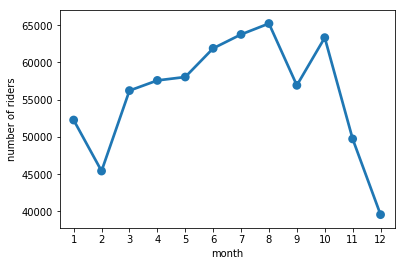

In [64]:
sns.pointplot(x='month', y='number of riders', data =df)


In [66]:
trips.isnull().values.ravel().sum()

0

In [75]:
df_sept_dec = df.iloc[8:12,:]
print (df_sept_dec)

    month  number of riders
8       9             56925
9      10             63325
10     11             49735
11     12             39571
